In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [50]:
import numpy as np
import pandas as pd
import scipy.io
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
from scipy.io import loadmat

In [19]:
data = loadmat("/content/gdrive/My Drive/ML_Assignment/Dataset/dataset_1.mat")

In [20]:
X = data['samples']

In [21]:
X=X.reshape(50000,28*28 )
X=pd.DataFrame(data=X)
X_embedded = TSNE(n_components =3).fit_transform(X)
X_embedded.shape

(50000, 3)

In [60]:
df = pd.DataFrame(X_embedded)

In [61]:
df.head()

,0,1,2
0,8.053956,1.482892,-0.643213
1,4.280782,-9.046332,-13.307445
2,6.120238,21.873053,6.009800
3,-0.548302,-13.077296,12.410436
4,0.397044,8.846322,14.305291


In [62]:
df.columns = ['x', 'y', 'z'] 
label=data['labels'][0]
lable=label.tolist()
df['label1']=lable
df.head()

,x,y,z,label1
0,8.053956,1.482892,-0.643213,5
1,4.280782,-9.046332,-13.307445,0
2,6.120238,21.873053,6.009800,4
3,-0.548302,-13.077296,12.410436,1
4,0.397044,8.846322,14.305291,9


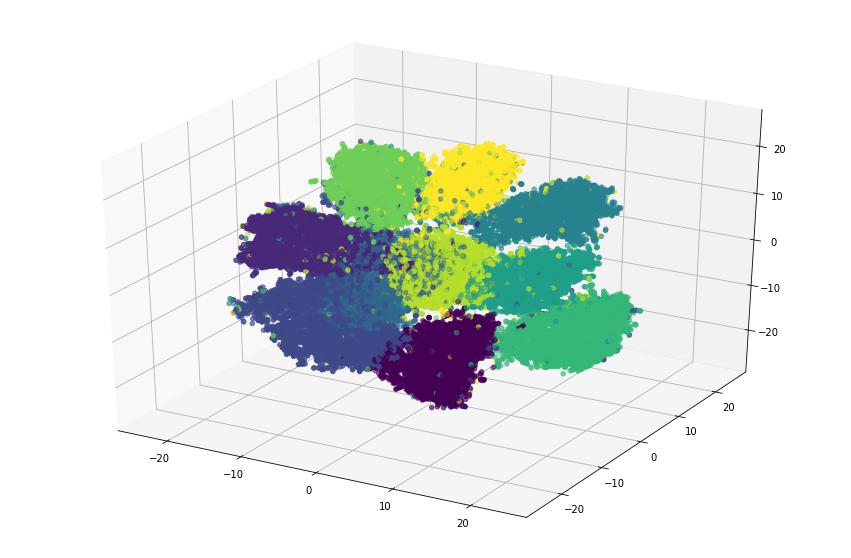

In [78]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.x,df.y,df.z,c=df.label1)

In [63]:
import plotly.express as px
plt.figure(figsize=(15,10))
fig = px.scatter_3d(df, x='x', y='y', z='z',color='label1')
fig.show()

<Figure size 1080x720 with 0 Axes>

In [52]:
sns.scatterplot(df, hue='label1')

ValueError: ignored

In [45]:
groups = data.groupby("label1")
for name, group in groups:
    plt.plot(group["X Value"], group["Y Value"], marker="o", linestyle="", label=name)
plt.legend()

AttributeError: ignored

AttributeError: ignored

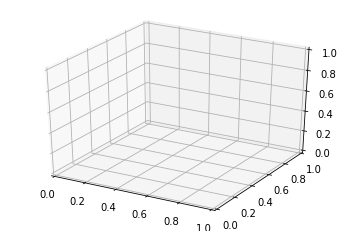

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['y'], df['z'], hue="label1",palette="deep")
ax.view_init(30, 185)
plt.show()
